<a href="https://colab.research.google.com/github/dis-is-pj/Company-Classification-Capstone-Project/blob/main/Prashant_Jha_Company_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 

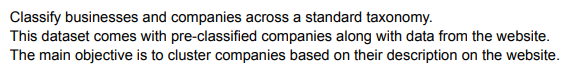

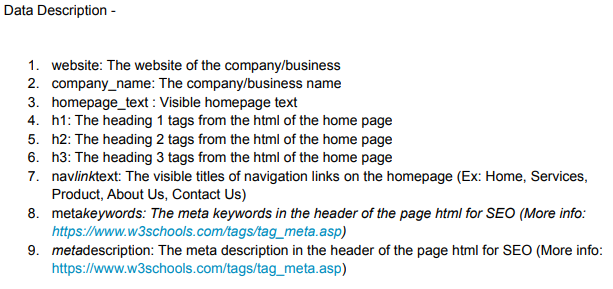

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Cohort Nilgiri/Module 4/Unsupervised Learning Capstone Project/data_company_classification.csv'

In [ ]:
# let's load the data
df = pd.read_csv(path)

# Exploring the data and null values

In [ ]:
# have a look at the data
df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [ ]:
# size of data
df.shape

(73974, 9)

So we have 9 columns in our dataset.

In [ ]:
# null value analysis in each column
df.isnull().sum()

website                 0
company_name            0
homepage_text         669
h1                  27321
h2                  20762
h3                  29315
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

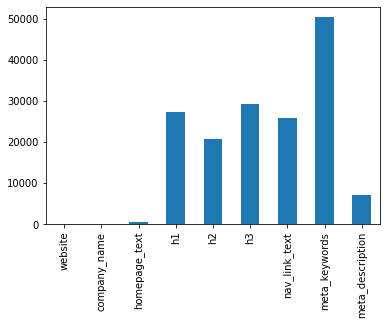

In [ ]:
df.isnull().sum().plot.bar()

Two columns website and company_name has no null values. Homepage_text also has almost no null values.

I can make one heading column by combining h1,h2 and h3.

In [ ]:
# making a new column by combining h1,h2,h3

df['headings'] = df['h1'].fillna('') + ' ' +df['h2'].fillna('') + ' ' + df['h3'].fillna('')

In [ ]:
# dropping indivisual headings columns
df.drop(['h1','h2','h3'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'nav_link_text',
       'meta_keywords', 'meta_description', 'headings'],
      dtype='object')

In [ ]:
# now againg get the idea of null values in rest columns
df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum()

homepage_text         669
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

In [ ]:
# getting null value distribtuion row wise
df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In these four columns 350 rows has all of them missing. We should remove the rows where at least three of them are missing.



In [ ]:
# making a column which has the count of null values in these four columns : 'homepage_text', 'nav_link_text','meta_keywords', 'meta_description'

df['null_count'] = df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1)

In [ ]:
# getting the rows with more than three missing values out of the four columns mentioned above
df = df[df['null_count']<3]

df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(70650, 8)

In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'nav_link_text',
       'meta_keywords', 'meta_description', 'headings', 'null_count'],
      dtype='object')

In [ ]:
# dropping the 'null_count' column
df.drop('null_count', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now we will combine the text information from all the columns into a single column

In [ ]:
# before combining the columns
# we need to replace null values with empty strings
df.fillna('', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# making single columns with all text information
# separated by space
df['text'] = df['homepage_text'] + ' ' + df['nav_link_text'] + ' ' + df['meta_keywords'] + ' ' + df['meta_description'] + ' ' + df['headings']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# keeping only important columns in a separate dataframe
data = df[['website', 'company_name', 'text']]

In [ ]:
data.shape

(70650, 3)

In [ ]:
data.tail()

,website,company_name,text
70645,nayyarsons.com,nayyarsons food,"Nayyarsons, Deli, Bakery, Food Servi..."
70646,claddaghcoffeecafe.com,claddagh coffee,Home About Us Our S...
70647,beautyologist.com.au,beautyologist,03 9531 5092 M...
70648,beautycall.co.uk,beauty call,...
70649,littleladyfoods.com,little lady foods,...


## Looking at special characters in our data

In [ ]:
s = 'abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ'
specials = set()

In [ ]:
for text in df['text']:
    for c in text:
        if c not in s:
            specials.add(c)

In [ ]:
to_unicode('bunty濯🏠𝙖 bhai 💕')

'bunty bhai '

In [ ]:
for special in specials:
    print(special[:2000])

Streaming output truncated to the last 5000 lines.


养
Ñ
😞
한
减
疯
ť
叠
刺

±
筏
哪

께
乏
🥶
ニ
辖
💘
拧
⇨
責
ắ
ล
乃
💛
🤷

啡
ੁ
泓

ฆ
“
𝗣
☑
川
幸

気
劃
ー
彩
다
ໍ
Х
ो
港


带
夫
読
章
ु
↔
剛
众
阳
羙
Į
要
嫩
丹
根
放
到
汇

發
橋
아
载
仿
🍽
烯
૫
⋮
💞
‑
찾
غ
隊
ಷ
절
🤤
郴
변
葡
宋
翅
洞
收

個
ീ
客
Ｚ
ದ
克

誠
郊
济
用
以
󠁧
美

韵
渐

거
Ν
塗
防
📈
ὶ


🏼
디
思
વ

న
🏔
为
規
🎖

ሻ
事
𝐎
剥
👯
贷
ಯ
更
晤

芳
菱
昭
辨
偷
⧉
喹
采
凰
ꜰ
瑟
俊
男

织
奷
ぜ
倍
ế

秦
屌
囵
켓



夕

펌
ὰ

್
袋

š
ร
南


თ
反
ಶ
ি
≠

🥪
砥
ॉ
💫
Š
법
μ
递
枢
橡
医
舰
ਹ
潤
네
혜

ф
鉢
👑
鹰
磁
勿
穷
狙

怡
ك
瘫
３
诣

𝘵
ద
梓
轨
纪
绩
没
⨉
𝐯
被
射
ೖ
せ

ฯ
肠
➡
部

ŷ
ᴜ
孚
處
郝
ይ

ஹ
🥞

В
哲
𝐃
林
貫
𝗧
易
📘
颖
胆
ς
록
°
椿
富
喷


凤
র
喜
飘
洒
リ
ジ
ಒ
う
ਅ
额
募
같
ɑ
芯
１
織
奉
預
🏁
ň
畢
助
洧
节


較
🍌
ಪ
ガ
踪

ě
ള
柚
􀃶
ਣ
耳
黛

署
𝙜
💬
👨
ಎ
勢
這
Í
硕
峽
箋

誰

町
Ę

钢
恩
큰
⎮

衝

📓

л
杭
胞

ŵ
へ
冬
ኣ
ῃ
砍
輕
祥
ម

𝐤
逢

➥
ơ
即
ɴ

💙
顕

徐
涵
宅
납
ਂ

处
ن
塘
ච

§

と
🔢
愈
權
艙
帶
喉

ஜ
術
遍
扎
👆
赛
⟶
右

반

💃

波
관
商
🕶
ṣ
吕
论
였
脸
枚
诠

戀
誘
്
退
Ě
⌘
◙
💗
🍎

〉
汎
💓
游
炮
９
仓

♤
𝙈
シ
蜘

ૈ
杜
邮
关
肯
ሚ

発
異
己
ހ
🍾
작
版
✨
₺
革

償
🇺
道
✈
貴
ｕ
📧
尖
歩
𝐍
แ

팅
捐
ḵ
ಿ
並
চ
争
创
침
ዘ


立
ത
庭
農

# Text Cleaning

In [ ]:
import string
import unicodedata as ud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# this function removes emojis and also converts visually similar characters to normat Lating characters
def to_unicode(text):
    return ud.normalize('NFD', text).encode('ascii','ignore').decode('utf-8')

# function to remove punctuations
def remove_punctuation(text):
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)


stop_words = stopwords.words('english')
stop_words.extend(['contact','us'])

# function to remove stopwords
def remove_stopwords(text):
    lst = [word for word in text.split() if word not in stop_words]
    return ' '.join(lst)


stemmer = SnowballStemmer('english')

# function for stemming
def stemming(text):
    l = [stemmer.stem(word) for word in text.split()]
    return " ".join(l)

In [ ]:
# function for cleaning text
def clean_text(text):
    text = to_unicode(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = stemming(text)

    return text

In [ ]:
# cleaning the text column
data['text'] = data['text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# we also need to remove numbers from the text
def remove_number(text):
    return ''.join([i for i in text if not i.isdigit()])

In [ ]:
data['text'] = data['text'].apply(remove_number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.columns

Index(['website', 'company_name', 'text'], dtype='object')

In [ ]:
data.head()

,website,company_name,text
0,bipelectric.com,bip dipietro electric inc,electrician electr contractor serv vero beach ...
1,eliasmedical.com,elias medical,site map en espanol elia medic home us skin ca...
2,koopsoverheaddoors.com,koops overhead doors,home about us garag door repair servic designa...
3,midtowneyes.com,midtown eyecare,type size a a a home our practic our servic p...
4,reprosecurity.co.uk,repro security ltd,simpli fill form back touch arrang free no obl...


In [ ]:
data['text'].shape

(70650,)

In [ ]:
data['text'].values

array(['electrician electr contractor serv vero beach fl indian river counti florida area fifteen year local own oper bip dipietro electr dedic provid help reliabl electr servic residenti commerci retail client alik we fulli licens insur expert staff electrician readi serv vero beach area time week day night bip dipietro electr full servic firm special area electr instal commerci residenti build alik we believ job need done need done right all employe bip dipietro electr strive give client exact plan specifi instal way meant instal not electr necess day also technolog must treat caution respect all electrician bip dipietro electr certifi know mean no corner cut item left the job done right way we would like thank take time visit web site feel free look around site pleas contact us question compani servic may provid contact bip dipietro electr vero beach electr contractor extern link disclaim make a payment copyright  present don associ inc dba dna web servic design host email mainten p

In [ ]:
# saving the cleaned data into a new csv file
path = '/content/drive/MyDrive/Cohort Nilgiri/Module 4/Unsupervised Learning Capstone Project/cleaned.csv'

data.to_csv(path, index=False)

# Vectorization

In [ ]:
path = '/content/drive/MyDrive/Cohort Nilgiri/Module 4/Unsupervised Learning Capstone Project/cleaned.csv'

data = pd.read_csv(path)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# creating vectorizer object
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.02)

In [ ]:
X = vectorizer.fit_transform(data['text'])

In [ ]:
X.shape

(70650, 1805)

# Making Clusters

Clustering such huge data on GPU will take a lot of time. So we have to create clusters on GPU.

In [ ]:
%%capture
!pip install kmeanstf

In [ ]:
from kmeanstf import KMeansTF
from scipy.spatial.distance import cdist

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
X = X.toarray()

In [ ]:
# Within Cluster sum of Squares score
# for determining the right number of clusters
distortions = []

In [ ]:
K = range(2,21)
for k in K:
    model = KMeansTF(n_clusters=k, random_state=42)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [ ]:
len(distortions)

19

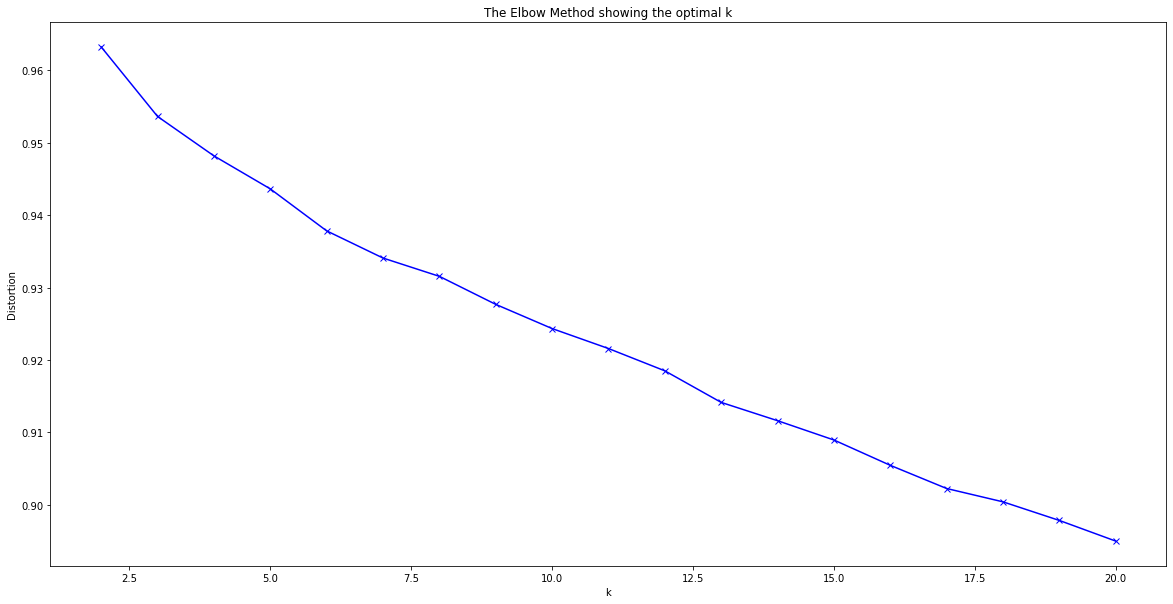

In [ ]:
# Plot the elbow
plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

If we look carefully, we can observe that between k=12 to 13, there is a relatively significant drop in the score but after k=13, there is no significant dip in the graph. So we can go with 13 clusters.

Now let's try sihoutte score

In [ ]:
from sklearn.metrics import silhouette_score

Calculating sihoutte_score is a complex process and will take forever on a dataset this huge. But! We have a solution. Instead of using whole cluster, we can use a sample of each cluster to calculate Silhoutte scores and can decide on number of clusters.

In [ ]:
def sample_silhoutte_score(X, y, ratio=0.1):
    # getting number of clusters
    k = max(y)+1

    # create a dictionary where keys are cluster label
    # and values are list of indices of the points alotted to the label
    cluster_dict = {i:np.where(y==i)[0] for i in range(k)}

    # creating samples
    y_sample = []
    X_sample = []

    for i in cluster_dict.keys():
        sample_size = int(cluster_dict[i].shape[0]*ratio)
        indexes = np.random.choice(a=cluster_dict[i], size=sample_size)
        sample = np.take(a=X, indices=indexes, axis=0)
        labels = [i]*sample_size
        y_sample.extend(labels)
        X_sample.extend(sample)

    return silhouette_score(np.array(X_sample), y_sample)


In [ ]:
scores = []

for k in range(2,21):
    model = KMeansTF(n_clusters=k, random_state=42)
    y = model.fit_predict(X)
    # taking 30% ratio
    score = sample_silhoutte_score(X, y, ratio=0.3)
    scores.append(score)

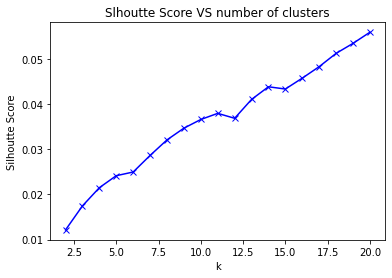

In [ ]:
plt.plot(range(2,21), scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.title('Slhoutte Score VS number of clusters')
plt.show()

## Let's Make four Clusters

In [ ]:
kmeanstf = KMeansTF(n_clusters=13)

In [ ]:
y = kmeanstf.fit_predict(X)

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
# let's collect text for all four clusters
data['label'] = y

text = []

for i in range(13):
    cluster_df = data[data['label']==i]
    text.append(' '.join(list(cluster_df['text'])))

In [ ]:
len(text)

13

In [ ]:
from wordcloud import WordCloud

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
# fucntion to create wordcloud
def word_cloud(text):
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Health Care

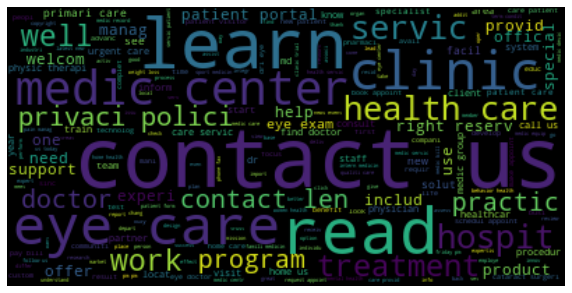

In [ ]:
word_cloud(text[0])

Energy 

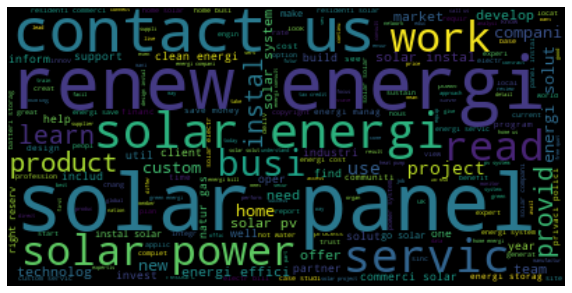

In [ ]:
word_cloud(text[1])

Industry manufacturing

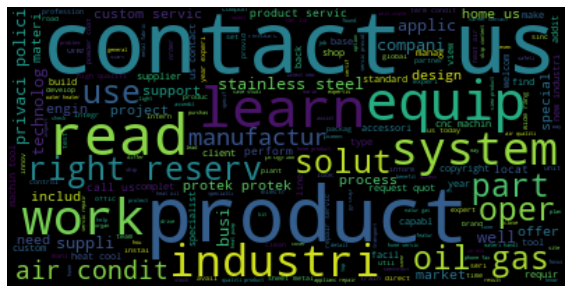

In [ ]:
word_cloud(text[2])

Legal affairs

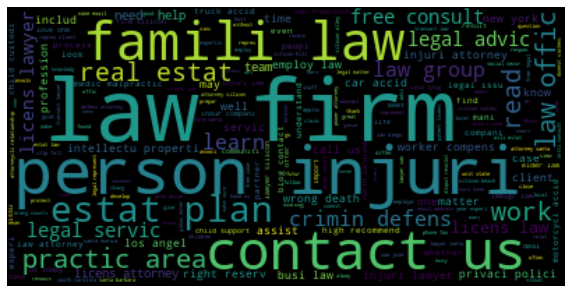

In [ ]:
word_cloud(text[3])

Financial

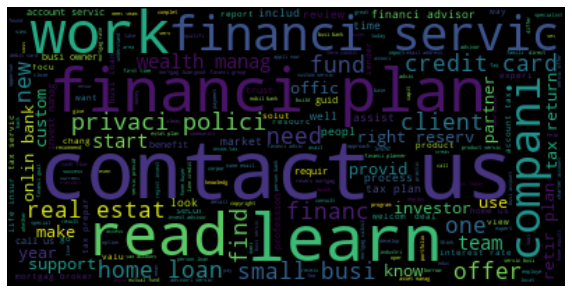

In [ ]:
word_cloud(text[4])

Hospitality

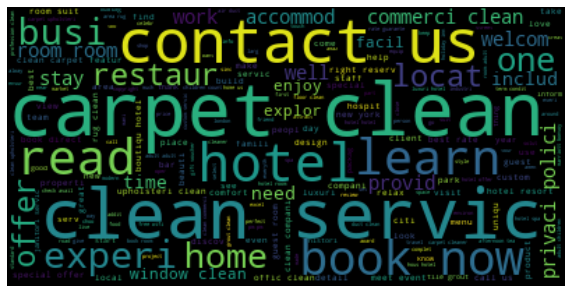

In [ ]:
word_cloud(text[5])

E Commerce

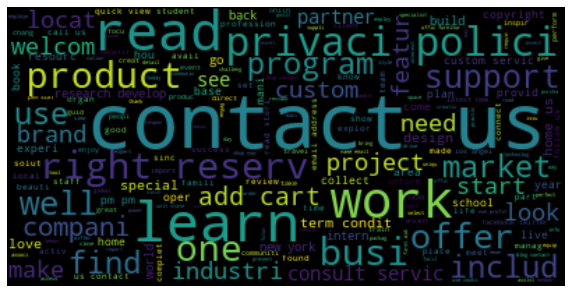

In [ ]:
word_cloud(text[6])

IT

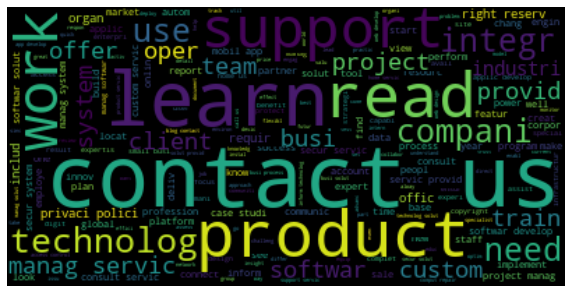

In [ ]:
word_cloud(text[7])

Digital Marketing

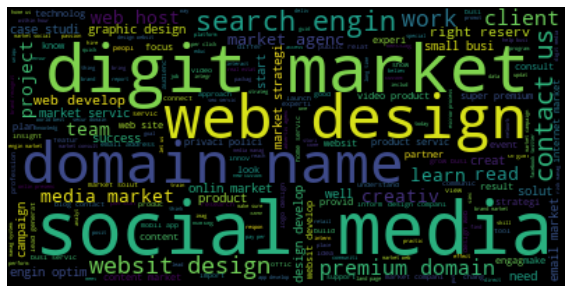

In [ ]:
word_cloud(text[8])

Logistics

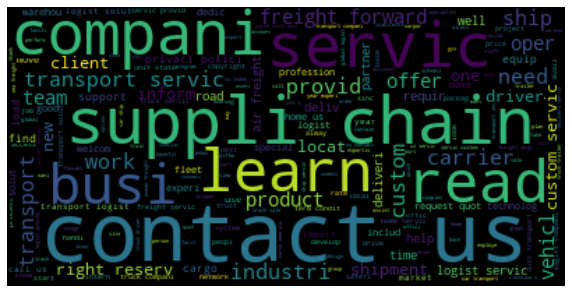

In [ ]:
word_cloud(text[9])

Animal Healthcare

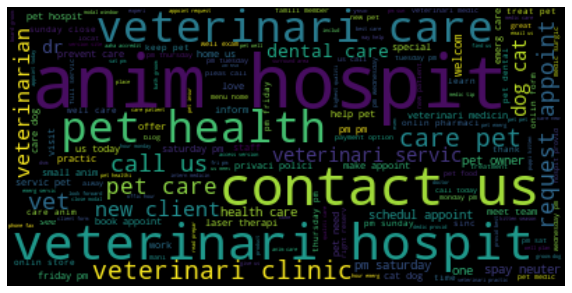

In [ ]:
word_cloud(text[10])

Insurance

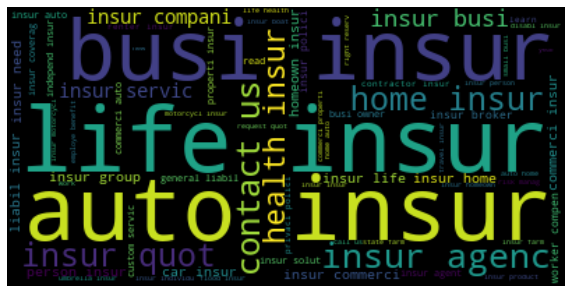

In [ ]:
word_cloud(text[11])

Real Estate

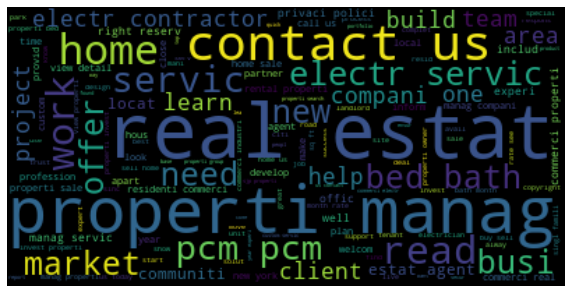

In [ ]:
word_cloud(text[12])